# Goal: 

Predict how fast an item can sell

likely modeled as a regression problem for time duration or classification 

if grouped into sales speed categories, e.g., fast, average, slow


# Step 1: Load Dataset

In [34]:
import pandas as pd
import zipfile

# Path to the ZIP file
zip_path = '../Datasets/data.zip'

# Create a dictionary to store DataFrames
dataframes = {}

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List all files in the ZIP
    file_list = z.namelist()
    
    # Filter only valid CSV files in the 'data/' directory
    valid_files = [f for f in file_list if f.startswith('data/') and f.endswith('.csv') and not f.startswith('__MACOSX')]

    # Iterate over filtered files
    for file_name in valid_files:
        print(f"Processing file: {file_name}")  # Log the file being processed
        with z.open(file_name) as f:  # Open the file within the ZIP
            try:
                # Attempt to read the CSV file
                df = pd.read_csv(f, encoding='utf-8')
                # Only store non-empty DataFrames
                if not df.empty:
                    stripped_name = file_name.split('/')[-1]  # Get file name without the folder path
                    dataframes[stripped_name] = df
                    # Log the number of rows
                    print(f"Rows in {file_name}: {len(df)}")
                else:
                    print(f"Skipped empty file: {file_name}")
            except pd.errors.EmptyDataError:
                # Skip files that are empty
                print(f"Skipped empty file: {file_name}")
            except Exception as e:
                # Handle other unexpected errors
                print(f"Error reading {file_name}: {e}")


Processing file: data/171243_EBAY-US.csv
Rows in data/171243_EBAY-US.csv: 10000
Processing file: data/1281_EBAY-US.csv
Rows in data/1281_EBAY-US.csv: 69
Processing file: data/1_EBAY-US.csv
Rows in data/1_EBAY-US.csv: 59
Processing file: data/293_EBAY-US.csv
Rows in data/293_EBAY-US.csv: 4794
Processing file: data/117419_EBAY-US.csv
Rows in data/117419_EBAY-US.csv: 9999
Processing file: data/184488_EBAY-US.csv
Rows in data/184488_EBAY-US.csv: 1760
Processing file: data/20628_EBAY-US.csv
Rows in data/20628_EBAY-US.csv: 5644
Processing file: data/26395_EBAY-US.csv
Rows in data/26395_EBAY-US.csv: 21
Processing file: data/550_EBAY-US.csv
Rows in data/550_EBAY-US.csv: 124
Processing file: data/117422_EBAY-US.csv
Rows in data/117422_EBAY-US.csv: 2032
Processing file: data/117421_EBAY-US.csv
Rows in data/117421_EBAY-US.csv: 2699
Processing file: data/170098_EBAY-US.csv
Rows in data/170098_EBAY-US.csv: 10000
Processing file: data/11233_EBAY-US.csv
Rows in data/11233_EBAY-US.csv: 250
Processing 

In [35]:
# Display the loaded DataFrames
print(f"Loaded {len(dataframes)} DataFrames.")
for name, df in dataframes.items():
    print(f"DataFrame from {name}:")
    print(df.head())  # Print the first few rows of each DataFrame
    print()

Loaded 35 DataFrames.
DataFrame from 171243_EBAY-US.csv:
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedback Score  \
0      USD  Brand New    Books     45maxellen68            1520   
1      USD  Brand New    Books  jmratkowski95sh            1225   
2      USD   Like New    Books     bmrfq03kde46               4   
3      USD  Very Good    Books      second.sale         3660470   
4      USD       Good    Books     paisleycrazy            5302   

   Positive Feedback %  Top Rated Seller  ... Buy It Now Available  \
0      

### Validate the dataframes

In [36]:
# Get the reference columns (using the first DataFrame in the dictionary)
reference_columns = list(next(iter(dataframes.values())).columns)
print("Reference Columns:", reference_columns)

# Filter DataFrames with matching columns
aligned_dataframes = {
    name: df for name, df in dataframes.items() if list(df.columns) == reference_columns
}

# List DataFrames that are misaligned
misaligned_files = [
    name for name, df in dataframes.items() if list(df.columns) != reference_columns
]

print(f"Aligned DataFrames: {len(aligned_dataframes)}")
print(f"Misaligned DataFrames: {len(misaligned_files)}")
print("Misaligned Files:", misaligned_files)

# Combine aligned DataFrames
combined_df = pd.concat(aligned_dataframes.values(), ignore_index=True)

# Display the combined DataFrame
print(f"Combined DataFrame shape: {combined_df.shape}")
print(combined_df.head())

Reference Columns: ['Title', 'Item ID', 'Price', 'Currency', 'Condition', 'Category', 'Seller', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller', 'Shipping Type', 'Shipping Cost', 'Listing Type', 'Buy It Now Available', 'Start Time', 'End Time', 'Store Name', 'Store URL', 'Gallery URL', 'Large Image URL', 'Super Size Image URL', 'View Item URL', 'Marketplace']
Aligned DataFrames: 35
Misaligned DataFrames: 0
Misaligned Files: []
Combined DataFrame shape: (96989, 23)
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedbac

**Findings** 

No misalignment between 35 dataframes created from 35 different csv files. 

Proceeding with combining the dataframes.

### Combine the dataframes

In [37]:
# Combine all DataFrames into one
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the shape of the combined DataFrame
print(f"Combined DataFrame shape: {combined_df.shape}")

# Preview the combined DataFrame
print(combined_df.head())

Combined DataFrame shape: (96989, 23)
                                               Title       Item ID  Price  \
0  Chicken Soup for the Soul: Christmas Magic: 10...  116382827420   3.99   
1  CreativeHavenHome forthe Holidays Coloring Boo...  286082795097   6.88   
2  The Dead of Winter: Beware the Krampus and Oth...  305886555883   6.64   
3  Christmas with Martha Stewart Living Classic C...  267000460794   4.89   
4  Lot Of 10 Christmas Picture Books,  Look And F...  405331880741  18.00   

  Currency  Condition Category           Seller  Feedback Score  \
0      USD  Brand New    Books     45maxellen68            1520   
1      USD  Brand New    Books  jmratkowski95sh            1225   
2      USD   Like New    Books     bmrfq03kde46               4   
3      USD  Very Good    Books      second.sale         3660470   
4      USD       Good    Books     paisleycrazy            5302   

   Positive Feedback %  Top Rated Seller  ... Buy It Now Available  \
0                100.0    

**Findings**

Combined df has 96989 rows and 35 columns. 

Now going to do EDA on this df.

# Step 2: EDA

In [38]:
import numpy as np

In [39]:
# Make a copy of the combined_df
df = combined_df.copy()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96989 entries, 0 to 96988
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 96989 non-null  object 
 1   Item ID               96989 non-null  int64  
 2   Price                 96989 non-null  float64
 3   Currency              96989 non-null  object 
 4   Condition             92951 non-null  object 
 5   Category              96989 non-null  object 
 6   Seller                96989 non-null  object 
 7   Feedback Score        96989 non-null  int64  
 8   Positive Feedback %   96989 non-null  float64
 9   Top Rated Seller      96989 non-null  bool   
 10  Shipping Type         96989 non-null  object 
 11  Shipping Cost         76466 non-null  float64
 12  Listing Type          96989 non-null  object 
 13  Buy It Now Available  96989 non-null  bool   
 14  Start Time            96989 non-null  object 
 15  End Time           

In [41]:
# Convert start time and end time to correct dtype

df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], errors='coerce')

In [42]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:")
for col in numeric_columns:
    print(col)

# Select object (categorical or string) columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
for col in categorical_columns:
    print(col)

# Select boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns
print("\nBoolean Columns:")
for col in boolean_columns:
    print(col)

# Select datetime columns
datetime_columns = df.select_dtypes(include=['datetime']).columns
print("\nDatetime Columns:")
for col in datetime_columns:
    print(col)

Numeric Columns:
Item ID
Price
Feedback Score
Positive Feedback %
Shipping Cost

Categorical Columns:
Title
Currency
Condition
Category
Seller
Shipping Type
Listing Type
Store Name
Store URL
Gallery URL
Large Image URL
Super Size Image URL
View Item URL
Marketplace

Boolean Columns:
Top Rated Seller
Buy It Now Available

Datetime Columns:
Start Time
End Time


In [43]:
for col in categorical_columns:
    unique_values = combined_df[col].nunique()
    print(f"{col}: {unique_values} unique values")
    print(combined_df[col].value_counts().head())  # Show top 5 values
    print()

Title: 68659 unique values
Title
African Tribal Shirt Mens Dashiki Print Fashion Hippie Top Blouse Casual Shirts     400
2 Pack Spill Stopper Lid Cover, 10.2 inch and 11 inch, Boil Over ‎Spill Stopp...    396
Diecast Plane EDISON AIR LINE H.F. R.A.F. S.E. 5a, 1917,  WW 1 Fighter Plane        300
Nordic Ware Christmas Pancake Pan Griddle Skillet Santa Tree Snowman Gingerbread    202
Plastic B747 Toy Airplane with Pencil Sharpener Christmas Special Made in Japan     200
Name: count, dtype: int64

Currency: 5 unique values
Currency
USD    94047
AUD     1201
GBP     1025
CAD      696
EUR       20
Name: count, dtype: int64

Condition: 17 unique values
Condition
New          55174
Used         11920
Good          6252
Brand New     6067
Very Good     4557
Name: count, dtype: int64

Category: 755 unique values
Category
Books                           10097
Wreaths, Garlands & Plants       9979
Greeting Cards & Invitations     9897
Contemporary Manufacture         5936
Nativity Items          

In [44]:
df.isna().sum()

Title                       0
Item ID                     0
Price                       0
Currency                    0
Condition                4038
Category                    0
Seller                      0
Feedback Score              0
Positive Feedback %         0
Top Rated Seller            0
Shipping Type               0
Shipping Cost           20523
Listing Type                0
Buy It Now Available        0
Start Time                  0
End Time                    0
Store Name              15676
Store URL               15676
Gallery URL              1041
Large Image URL          2888
Super Size Image URL     2888
View Item URL               0
Marketplace                 0
dtype: int64

In [45]:
# Calculate total rows in the DataFrame
total_rows = len(df)

# Calculate percentage of missing values
missing_percentage = df.isnull().sum() / total_rows * 100

# Combine missing counts and percentages into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing Percentage': missing_percentage
})

# Sort by percentage (descending order) for easier interpretation
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

# Display the summary
print(missing_summary)

                      Missing Count  Missing Percentage
Shipping Cost                 20523           21.160132
Store Name                    15676           16.162658
Store URL                     15676           16.162658
Condition                      4038            4.163359
Large Image URL                2888            2.977657
Super Size Image URL           2888            2.977657
Gallery URL                    1041            1.073318


### Investigate Missingness

In [46]:
# Shipping Cost

# Analyze Shipping Cost by Shipping Type
shipping_analysis = combined_df.groupby('Shipping Type')['Shipping Cost'].agg(['mean', 'median', 'count'])
print(shipping_analysis)

# Investigate rows with missing Shipping Cost
missing_shipping = combined_df[combined_df['Shipping Cost'].isnull()]
print("Rows with missing Shipping Cost by Shipping Type:")
print(missing_shipping['Shipping Type'].value_counts())


                                          mean  median  count
Shipping Type                                                
Calculated                                 NaN     NaN      0
CalculatedDomesticFlatInternational   0.000000    0.00     20
Flat                                  8.239184    5.90  20327
FlatDomesticCalculatedInternational   5.884258    4.50    721
Free                                  0.000000    0.00  52054
FreePickup                            0.000000    0.00   3341
Freight                                    NaN     NaN      0
NotSpecified                         16.023333    4.54      3
Rows with missing Shipping Cost by Shipping Type:
Shipping Type
Calculated                             20002
Flat                                     474
CalculatedDomesticFlatInternational       45
Freight                                    2
Name: count, dtype: int64


**Findings**

Observations from the Data
Shipping Types with Clear Patterns:

Free: Mean and median are 0.00 (consistent with free shipping).
FlatDomesticCalculatedInternational: Median is 4.50, and the count is significant (721).
Shipping Types with Missing Costs:

Calculated: Majority of missing values are in this category (20,002 rows), and there’s no information in the summary to impute directly.
Flat: Some missing values (474 rows), but median cost is 5.90, making it reasonable to impute with this value.
Small Categories:

Freight and NotSpecified: Very few rows with missing costs; imputation may rely on default values like the overall median.

In [47]:
df.columns

Index(['Title', 'Item ID', 'Price', 'Currency', 'Condition', 'Category',
       'Seller', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller',
       'Shipping Type', 'Shipping Cost', 'Listing Type',
       'Buy It Now Available', 'Start Time', 'End Time', 'Store Name',
       'Store URL', 'Gallery URL', 'Large Image URL', 'Super Size Image URL',
       'View Item URL', 'Marketplace'],
      dtype='object')

### Check skewness of numeric columns

In [48]:
# filter numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate skewness for each numeric column
skewness = df[numeric_cols].skew()

# Display skewness
print("Skewness of Numeric Columns:")
print(skewness)

Skewness of Numeric Columns:
Item ID                -0.138394
Price                  19.932290
Feedback Score          4.026940
Positive Feedback %    -6.115403
Shipping Cost           5.327665
dtype: float64


### Visualize Distributions of each numeric column

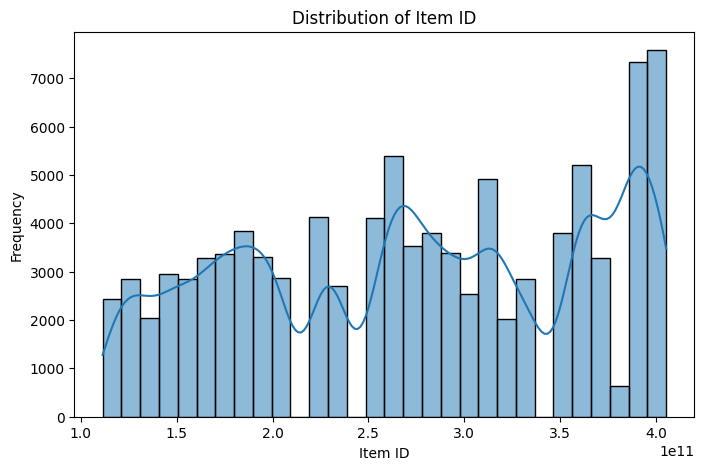

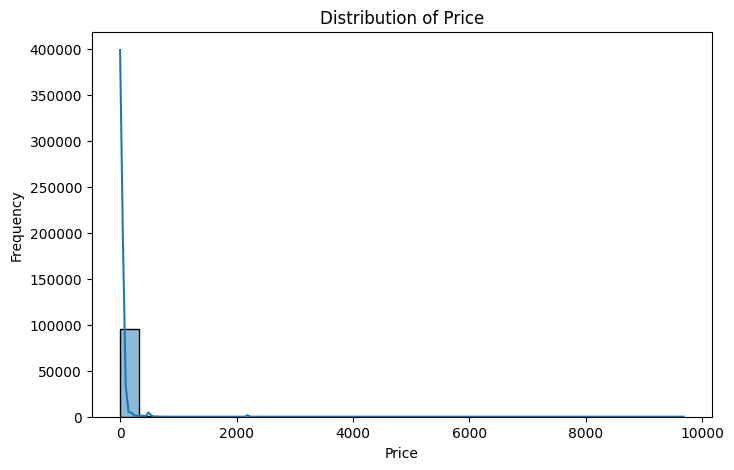

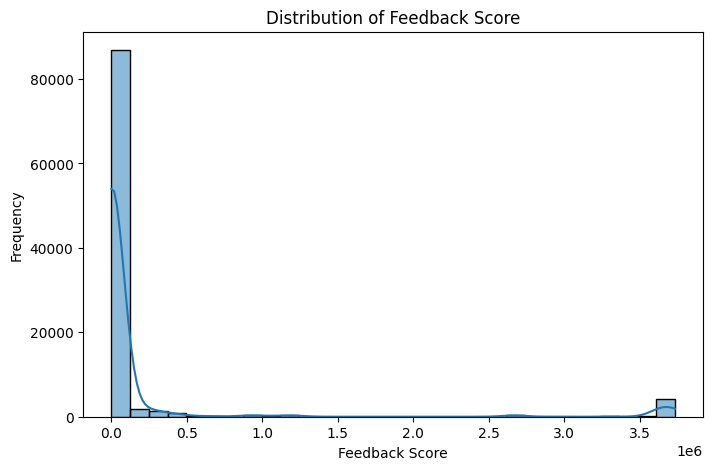

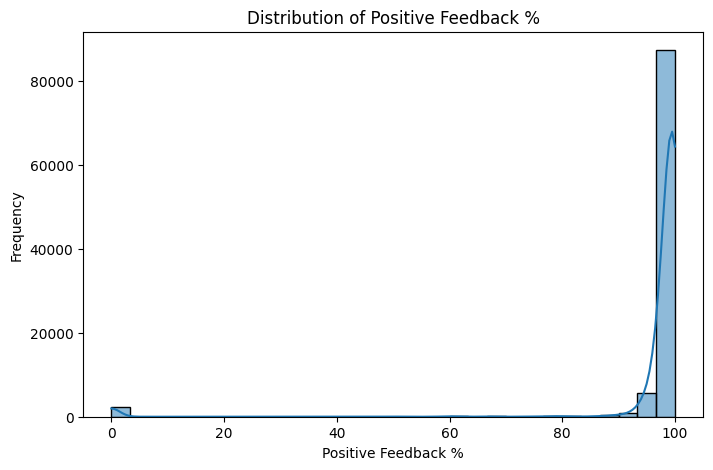

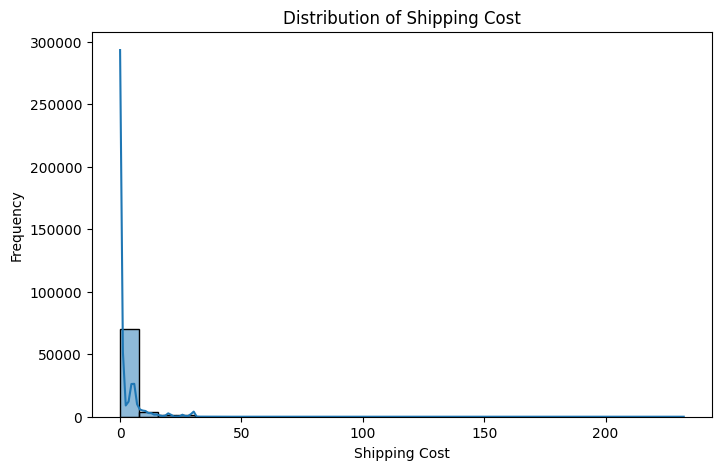

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(combined_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


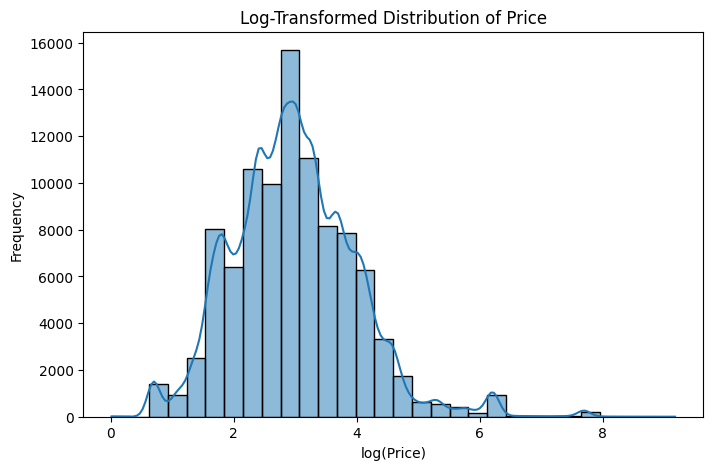

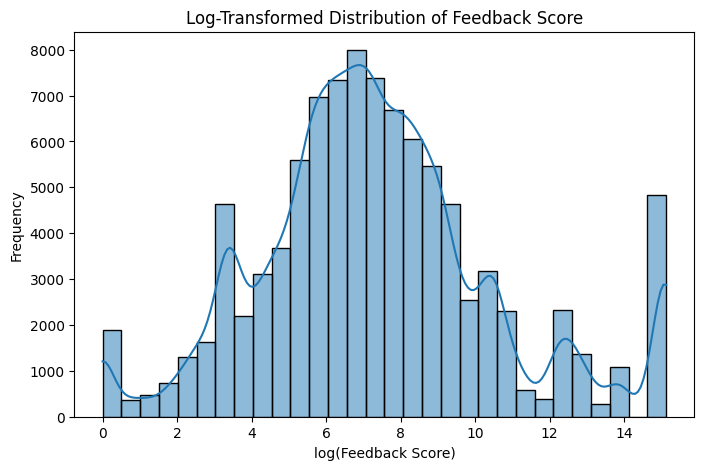

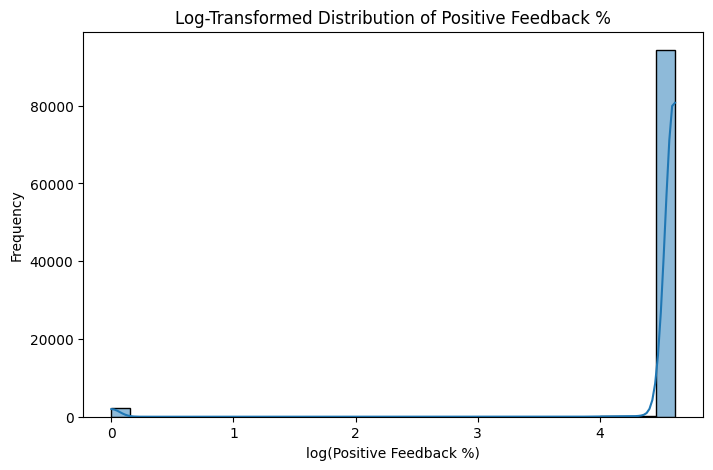

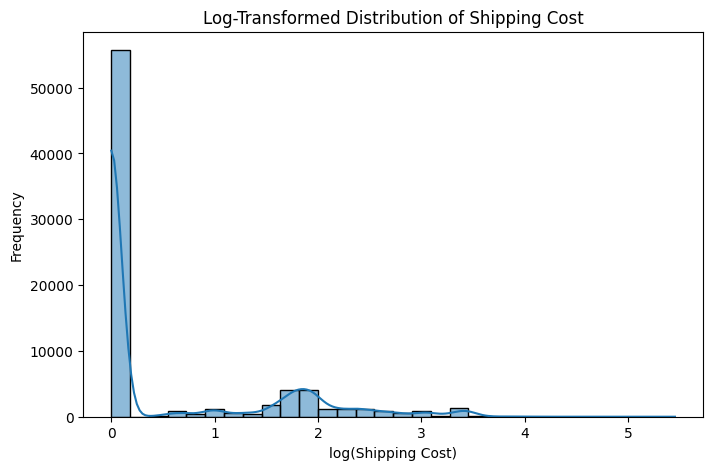

In [50]:

# Apply log1p transformation to skewed columns
for col in numeric_cols:
    if abs(combined_df[col].skew()) > 0.5:  # Log transform only for moderately/highly skewed columns
        plt.figure(figsize=(8, 5))
        sns.histplot(np.log1p(combined_df[col]), kde=True, bins=30)
        plt.title(f"Log-Transformed Distribution of {col}")
        plt.xlabel(f"log({col})")
        plt.ylabel("Frequency")
        plt.show()

**Findings**

Positive Feedback %:

It might have values very close to 100% for most items, making the distribution highly skewed and resistant to transformation.
If there are zeros or extremely small values, taking the log can exaggerate their influence.

Shipping Cost:

The column might contain many zero values, representing free shipping. Logarithmic transformations don’t handle zeros well, even with log1p.

!!! Navigating Positive Feedback column

In [51]:
print(df['Positive Feedback %'].describe())
print(df['Positive Feedback %'].value_counts().head())

count    96989.000000
mean        96.567655
std         15.049096
min          0.000000
25%         98.400000
50%         99.500000
75%        100.000000
max        100.000000
Name: Positive Feedback %, dtype: float64
Positive Feedback %
100.0    36088
98.4      4390
99.7      4286
99.6      3196
99.5      3194
Name: count, dtype: int64


**Findings**

Given the skewed nature of the Positve Feedback % column (many rows concentrated at 100%), Feedback Category is likely a better choice for Random Forest. 

It simplifies the feature and reduces the likelihood of the model being overwhelmed by the imbalance.

!!! Navigating Shipping Cost column

In [52]:
print(df['Shipping Cost'].describe())
print(df['Shipping Cost'].value_counts().head())

count    76466.000000
mean         2.246338
std          5.595454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.650000
max        232.210000
Name: Shipping Cost, dtype: float64
Shipping Cost
0.00     55706
5.99      1265
5.00      1000
5.95       920
30.00      910
Name: count, dtype: int64


**Findings**

Based on the summary statistics and distribution of Shipping Cost, 

it's clear that the data is highly skewed, with a majority of rows having a cost of 0.00 (likely indicating free shipping). 

Here's how we can handle this using two transformations: 

* a binary free shipping feature and 
* cost bins.

# Step 3: Data Transformation

### Target Column -> Sales Speed

#### 1. Extract Features from Start Time and End Time

Datetime columns can be decomposed into features that might influence the target variable (e.g., how fast items sell). 

In [53]:
# Calculate duration in hours
df['Duration (hours)'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 3600

In [54]:
# Extract temporal features from Start Time
df['Start Day'] = df['Start Time'].dt.day_name()  # Day of the week
df['Start Hour'] = df['Start Time'].dt.hour      # Hour of the day
df['Start Month'] = df['Start Time'].dt.month    # Month

# Extract temporal features from End Time
df['End Day'] = df['End Time'].dt.day_name()
df['End Hour'] = df['End Time'].dt.hour

In [55]:
# Create a weekend indicator for Start and End Time
df['Start Weekend'] = df['Start Time'].dt.dayofweek >= 5  # Saturday & Sunday
df['End Weekend'] = df['End Time'].dt.dayofweek >= 5

#### 2. Find correlation with the Target

In [56]:
print(df.columns.tolist())

['Title', 'Item ID', 'Price', 'Currency', 'Condition', 'Category', 'Seller', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller', 'Shipping Type', 'Shipping Cost', 'Listing Type', 'Buy It Now Available', 'Start Time', 'End Time', 'Store Name', 'Store URL', 'Gallery URL', 'Large Image URL', 'Super Size Image URL', 'View Item URL', 'Marketplace', 'Duration (hours)', 'Start Day', 'Start Hour', 'Start Month', 'End Day', 'End Hour', 'Start Weekend', 'End Weekend']


In [57]:
# Encode Start Day and End Day
df_encoded = pd.get_dummies(df, columns=['Start Day', 'End Day'], drop_first=True)

# Define temporal features (now including encoded columns)
temporal_features = [
    'Start Hour', 'Start Month', 'Start Weekend', 'End Hour', 'End Weekend'
] + [col for col in df_encoded.columns if col.startswith('Start Day_') or col.startswith('End Day_')]

# Correlation with target
correlation_with_target = df_encoded[temporal_features].corrwith(df_encoded['Duration (hours)'])
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
Start Hour             0.031545
Start Month           -0.289674
Start Weekend          0.040362
End Hour               0.002679
End Weekend           -0.027285
Start Day_Monday      -0.002611
Start Day_Saturday     0.026098
Start Day_Sunday       0.026622
Start Day_Thursday     0.014019
Start Day_Tuesday     -0.006639
Start Day_Wednesday   -0.051437
End Day_Monday         0.049172
End Day_Saturday      -0.003227
End Day_Sunday        -0.031844
End Day_Thursday       0.011507
End Day_Tuesday       -0.000680
End Day_Wednesday     -0.019977
dtype: float64


BOOKMARK!

**Correlation Insights (Time Features)**

* Keep Start Month:

    With a correlation of -0.2897, this feature captures seasonality and has moderate predictive power.

* Keep Start Weekend and Start Day:

    Although weakly correlated, weekend-related features (Start Weekend, Start Day_Saturday, Start Day_Sunday) might add slight value.

* Drop Weak Features: (**To drop these weak features afterwards**)

    * End Features: End Hour, End Weekend, and most End Day categories have minimal correlation with the target. Consider dropping them.

    * Start Hour: Very weak correlation (0.0315), likely not meaningful unless supported by other analysis.


#### 3. Dropping the Raw Datetime Columns

drop Start Time and End Time since we extracted data out of these

In [58]:
# Drop raw datetime columns
df = df.drop(columns=['Start Time', 'End Time'])

### Feature -> Transform Shipping Column

#### Step 1: Create the Binary Feature for Free Shipping

This will capture whether shipping is free (0.00) or not. 

This feature is simple but often effective, 

as free shipping can be a strong predictor of faster sales.

In [59]:
# Create a binary feature for free shipping
df['Free Shipping'] = (df['Shipping Cost'] == 0).astype(int)

# Check the distribution of the new feature
print(df['Free Shipping'].value_counts())

Free Shipping
1    55706
0    41283
Name: count, dtype: int64


**Findings**

Free Shipping Feature:

The binary Free Shipping feature (1 for free, 0 for paid shipping) captures a simple but meaningful distinction.

With 55706 free shipping entries and 41283 paid shipping entries, this feature provides a clear separation for the model to learn from.

#### Step 2: Categorize Shipping Cost into Bins

Given the wide range of values (0.00 to 232.21), 

creating bins will group shipping costs into meaningful categories (Low, Medium, High, Very High), 

reducing noise caused by extreme outliers.

Suggested Bins:

* `0` : Free shipping
* `1 - 5` : Low cost
* `5 - 15` : Medium cost
* `15 - 50` : High cost
* `>50` : Very high cost

In [60]:
# Define shipping cost bins
bins = [0, 5, 15, 50, np.inf]  # Bin ranges
labels = ['Free', 'Low', 'Medium', 'High']  # Bin labels

# Create the binned feature
df['Shipping Cost Bin'] = pd.cut(
    df['Shipping Cost'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Check the distribution of the bins
print(df['Shipping Cost Bin'].value_counts())

Shipping Cost Bin
Free      64875
Low        8897
Medium     2657
High         37
Name: count, dtype: int64


**Findings**

Shipping Cost Bin Feature:

Binning has reduced the impact of outliers, making the data more manageable for models.

Categories like Low, Medium, and High are well-distributed:

* Free: Dominates (64875 rows), but that’s expected given the high skew toward free shipping.
* Low & Medium: Provide good granularity.
* High: Rare cases, but still included as a category for edge situations.

In [61]:
df.columns

Index(['Title', 'Item ID', 'Price', 'Currency', 'Condition', 'Category',
       'Seller', 'Feedback Score', 'Positive Feedback %', 'Top Rated Seller',
       'Shipping Type', 'Shipping Cost', 'Listing Type',
       'Buy It Now Available', 'Store Name', 'Store URL', 'Gallery URL',
       'Large Image URL', 'Super Size Image URL', 'View Item URL',
       'Marketplace', 'Duration (hours)', 'Start Day', 'Start Hour',
       'Start Month', 'End Day', 'End Hour', 'Start Weekend', 'End Weekend',
       'Free Shipping', 'Shipping Cost Bin'],
      dtype='object')

### Feature -> Transform Positive Feedback % Column

Given the skewed nature of the data (many rows concentrated at 100%), Feedback Category is likely a better choice.

It simplifies the feature and reduces the likelihood of the model being overwhelmed by the imbalance.

Why Feedback Category for Random Forest

* Handles Skew Better: Simplifies the feature, reducing the impact of over-represented values like 100%.

* Improves Interpretability: Categorical splits like Feedback Category = Perfect are easier to understand.

* No Scaling Issues: Random Forest works well with categorical features and doesn’t require scaling.

#### Step 1: Convert Feedback Percentage to Categories

In [62]:
# Create Feedback Category
bins = [0, 90, 95, 99, 100]  # Define ranges
labels = ['Low', 'Medium', 'High', 'Perfect']
if 'Feedback Category' not in combined_df.columns:
    df['Feedback Category'] = pd.cut(
        df['Positive Feedback %'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

#### Step 2: Encode the Categorical Feature

In [63]:
# 1. One-Hot Encoding

df_onehot = pd.get_dummies(df, columns=['Feedback Category'], drop_first=True)
onehot_features = [col for col in df_onehot.columns if col.startswith('Feedback Category_')]

correlation_onehot = df_onehot[onehot_features].corrwith(df['Duration (hours)'])

print("Correlation with Target (One-Hot Encoding):")
print(correlation_onehot)


Correlation with Target (One-Hot Encoding):
Feedback Category_Medium    -0.026268
Feedback Category_High      -0.060831
Feedback Category_Perfect    0.084047
dtype: float64


In [64]:
# Recreate Feedback Category
if 'Feedback Category' not in df.columns:
    df['Feedback Category'] = pd.cut(
        df['Positive Feedback %'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

In [65]:
# Option 2: Ordinal Encoding 

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Perfect']])
df['Feedback Category Encoded'] = encoder.fit_transform(df[['Feedback Category']])

correlation_ordinal = df[['Feedback Category Encoded']].corrwith(df['Duration (hours)'])

print("\nCorrelation with Target (Ordinal Encoding):")
print(correlation_ordinal)


Correlation with Target (Ordinal Encoding):
Feedback Category Encoded    0.086651
dtype: float64


**Findings**

We are keeping both `Feedback Category (Ordinal)` and `Feedback Category (One-Hot)` for now since we’re still evaluating their impact on the model's performance.

In [66]:
df.columns.tolist()

['Title',
 'Item ID',
 'Price',
 'Currency',
 'Condition',
 'Category',
 'Seller',
 'Feedback Score',
 'Positive Feedback %',
 'Top Rated Seller',
 'Shipping Type',
 'Shipping Cost',
 'Listing Type',
 'Buy It Now Available',
 'Store Name',
 'Store URL',
 'Gallery URL',
 'Large Image URL',
 'Super Size Image URL',
 'View Item URL',
 'Marketplace',
 'Duration (hours)',
 'Start Day',
 'Start Hour',
 'Start Month',
 'End Day',
 'End Hour',
 'Start Weekend',
 'End Weekend',
 'Free Shipping',
 'Shipping Cost Bin',
 'Feedback Category',
 'Feedback Category Encoded']

In [67]:
df.isna().sum()

Title                            0
Item ID                          0
Price                            0
Currency                         0
Condition                     4038
Category                         0
Seller                           0
Feedback Score                   0
Positive Feedback %              0
Top Rated Seller                 0
Shipping Type                    0
Shipping Cost                20523
Listing Type                     0
Buy It Now Available             0
Store Name                   15676
Store URL                    15676
Gallery URL                   1041
Large Image URL               2888
Super Size Image URL          2888
View Item URL                    0
Marketplace                      0
Duration (hours)                 0
Start Day                        0
Start Hour                       0
Start Month                      0
End Day                          0
End Hour                         0
Start Weekend                    0
End Weekend         